# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
# import
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
# dataframe
data = pd.read_csv('Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


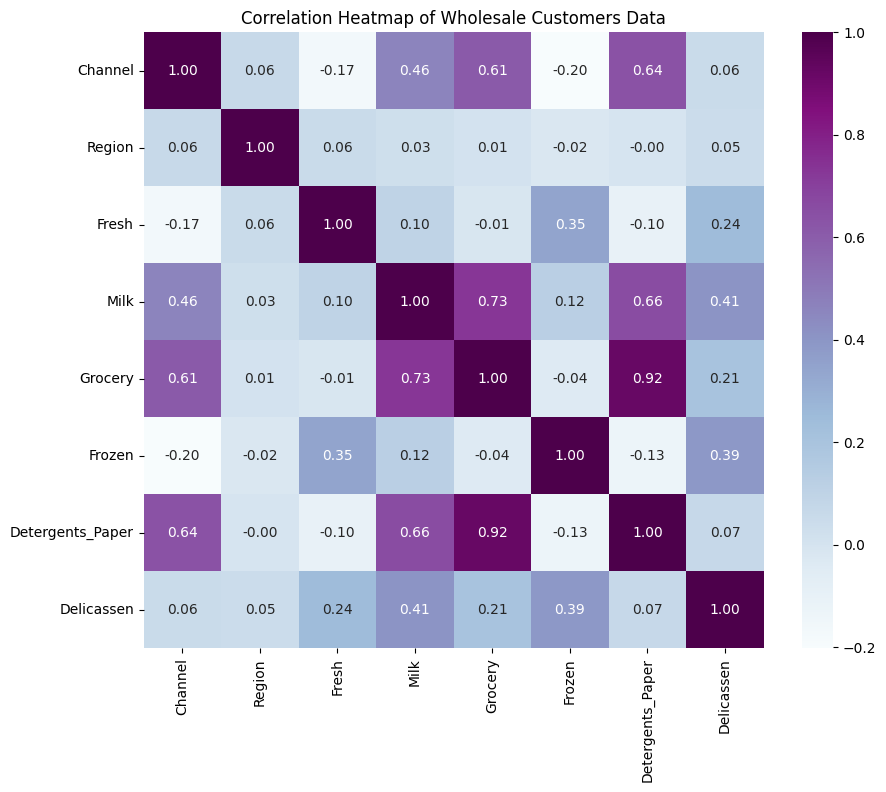

In [5]:
# Create the heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='BuPu', fmt='.2f')
plt.title('Correlation Heatmap of Wholesale Customers Data')
plt.show()

In [6]:
# remove columns with no correlations
data = data.drop(columns=["Region"])

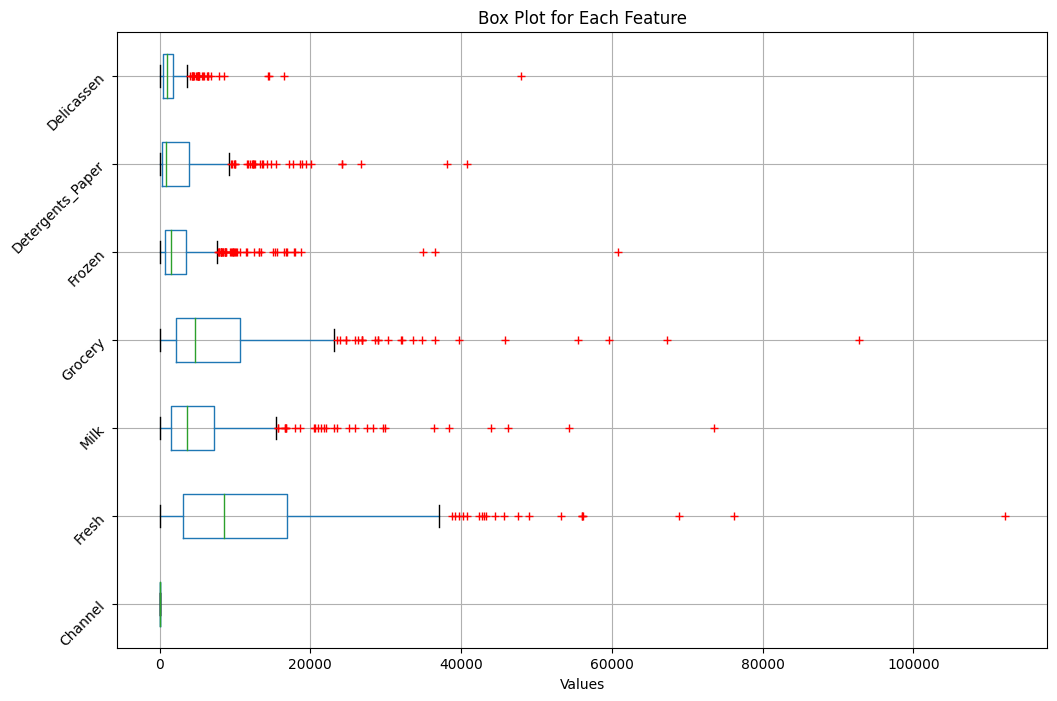

In [7]:
# Create box plots for each feature
plt.figure(figsize=(12, 8))
data.boxplot(rot=45, sym='r+', vert=False)
plt.title('Box Plot for Each Feature')
plt.xlabel('Values')
plt.show()

In [8]:
# Calculate the correlation between features
correlation1 = data['Grocery'].corr(data['Detergents_Paper'])
correlation2 = data['Grocery'].corr(data['Milk'])
correlation3 = data['Channel'].corr(data['Detergents_Paper'])
correlation4 = data['Channel'].corr(data['Grocery'])

print("Correlation between Grocery and Detergents_Paper:", correlation1)
print("Correlation between Grocery and Milk:", correlation2)
print("Correlation between Channel and Detergents_Paper:", correlation3)
print("Correlation between Channel and Grocery:", correlation4)


Correlation between Grocery and Detergents_Paper: 0.9246406908542681
Correlation between Grocery and Milk: 0.7283351181536449
Correlation between Channel and Detergents_Paper: 0.6360263670705512
Correlation between Channel and Grocery: 0.608792245191131


In [9]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Create a DataFrame with the Z-standardized data
columns = data.columns
data[columns] = data_standardized

# Display the Z-standardized data in the 'data' DataFrame
data.head()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [10]:
# Apply PCA with the number of components equal to the number of features
pca = PCA(n_components=min(data.shape[0], data.shape[1]))
data_pca = pca.fit_transform(data_standardized)

# Create a DataFrame with the PCA components
pca_components = ['PCA_Component_' + str(i+1) for i in range(data_pca.shape[1])]
data_pca_df = pd.DataFrame(data_pca, columns=pca_components)

# Display the DataFrame with the PCA components
data_pca_df.head()

,PCA_Component_1,PCA_Component_2,PCA_Component_3,PCA_Component_4,PCA_Component_5,PCA_Component_6,PCA_Component_7
0,0.829041,-0.543064,-0.121397,-0.596543,-0.970706,0.659858,0.018644
1,1.048167,-0.510652,0.336126,-0.279449,-0.916580,0.518421,0.078540
2,1.253613,0.656304,1.546917,-1.374122,-1.070848,-0.201779,-0.253524
3,-1.071759,0.585254,0.162317,0.385612,0.044591,-0.297582,0.055424
4,0.617812,0.946435,0.097599,-0.995724,-1.510478,-0.161142,0.004201


In [11]:
# Display the explained variance ratios
explained_variances = pca.explained_variance_ratio_
explained_variances_df = pd.DataFrame({'Explained_Variance_Ratio': explained_variances},
                                      index=pca_components)
explained_variances_df

,Explained_Variance_Ratio
PCA_Component_1,0.442675
PCA_Component_2,0.255500
PCA_Component_3,0.105737
PCA_Component_4,0.080703
PCA_Component_5,0.066200
PCA_Component_6,0.040214
PCA_Component_7,0.008970


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

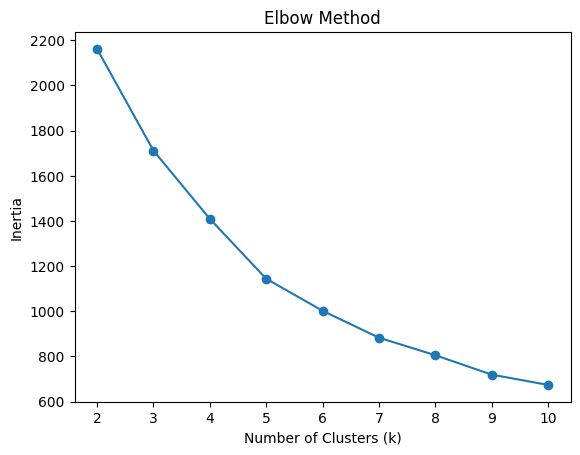

In [12]:
# Standardize the data using Z-standardization
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Implement the Elbow Method to find the optimal K value
inertia = []
range_clusters = range(2, 11) 
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(data_standardized)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


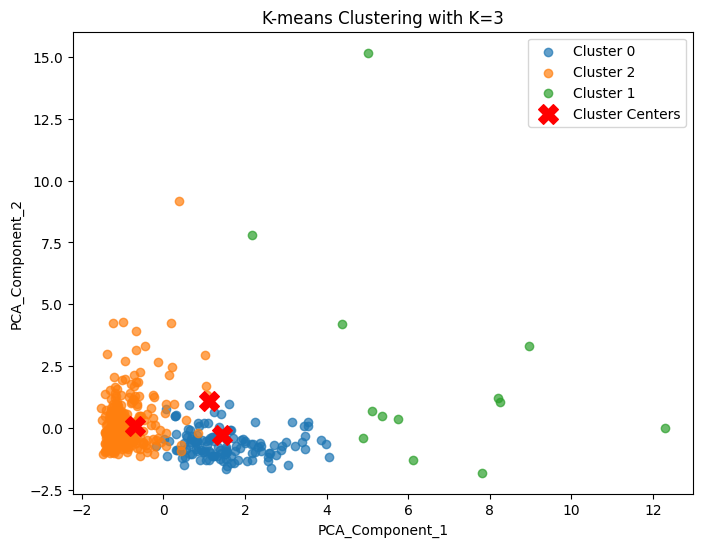

In [13]:
# Initialize the KMeans model with the chosen K value (3) and random_state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)

# Fit the KMeans model to the standardized data and assign data points to clusters
data['Cluster'] = kmeans.fit_predict(data_standardized)

# Apply PCA to reduce data to 3 components for visualization purposes
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_standardized)

# Create a DataFrame with the PCA components
pca_components = ['PCA_Component_' + str(i + 1) for i in range(data_pca.shape[1])]
data_pca_df = pd.DataFrame(data_pca, columns=pca_components)

# Get cluster centers from the KMeans model
cluster_centers = kmeans.cluster_centers_

# Plot the clusters and cluster centers
plt.figure(figsize=(8, 6))
for cluster in data['Cluster'].unique():
    plt.scatter(data_pca_df[data['Cluster'] == cluster]['PCA_Component_1'],
                data_pca_df[data['Cluster'] == cluster]['PCA_Component_2'],
                label=f'Cluster {cluster}', alpha=0.7)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='red', marker='X', label='Cluster Centers')
plt.xlabel('PCA_Component_1')
plt.ylabel('PCA_Component_2')
plt.title('K-means Clustering with K=3')
plt.legend()
plt.show()

In [14]:
# Get the number of iterations for convergence
num_iterations = kmeans.n_iter_
print(f'Number of iterations for convergence: {num_iterations}')


Number of iterations for convergence: 6


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [15]:
# Select the features for clustering (excluding 'Region')
features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_selected = data[features]

# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_selected)

# Calculate the distance matrix using Euclidean distance
distance_matrix = cdist(data_standardized, data_standardized, metric='euclidean')

# Perform Agglomerative clustering
n_clusters = 3  # Set the number of clusters you want
agglomerative_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
cluster_labels = agglomerative_clustering.fit_predict(data_standardized)

# Add the cluster labels to the original DataFrame
data['Cluster'] = cluster_labels

# Display the clustered data
data['Cluster'].unique()


array([2, 1, 0], dtype=int64)

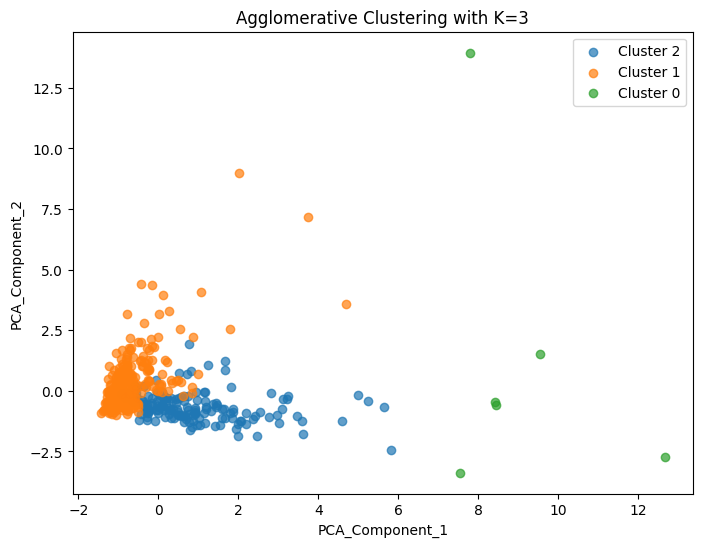

In [23]:
# Apply PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

# Create a DataFrame with PCA components for visualization
pca_df = pd.DataFrame(data_pca, columns=['PCA_Component_1', 'PCA_Component_2'])

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in data['Cluster'].unique():
    plt.scatter(pca_df[data['Cluster'] == cluster]['PCA_Component_1'],
                pca_df[data['Cluster'] == cluster]['PCA_Component_2'],
                label=f'Cluster {cluster}', alpha=0.7)
plt.xlabel('PCA_Component_1')
plt.ylabel('PCA_Component_2')
plt.title('Agglomerative Clustering with K=3')
plt.legend()
plt.show()

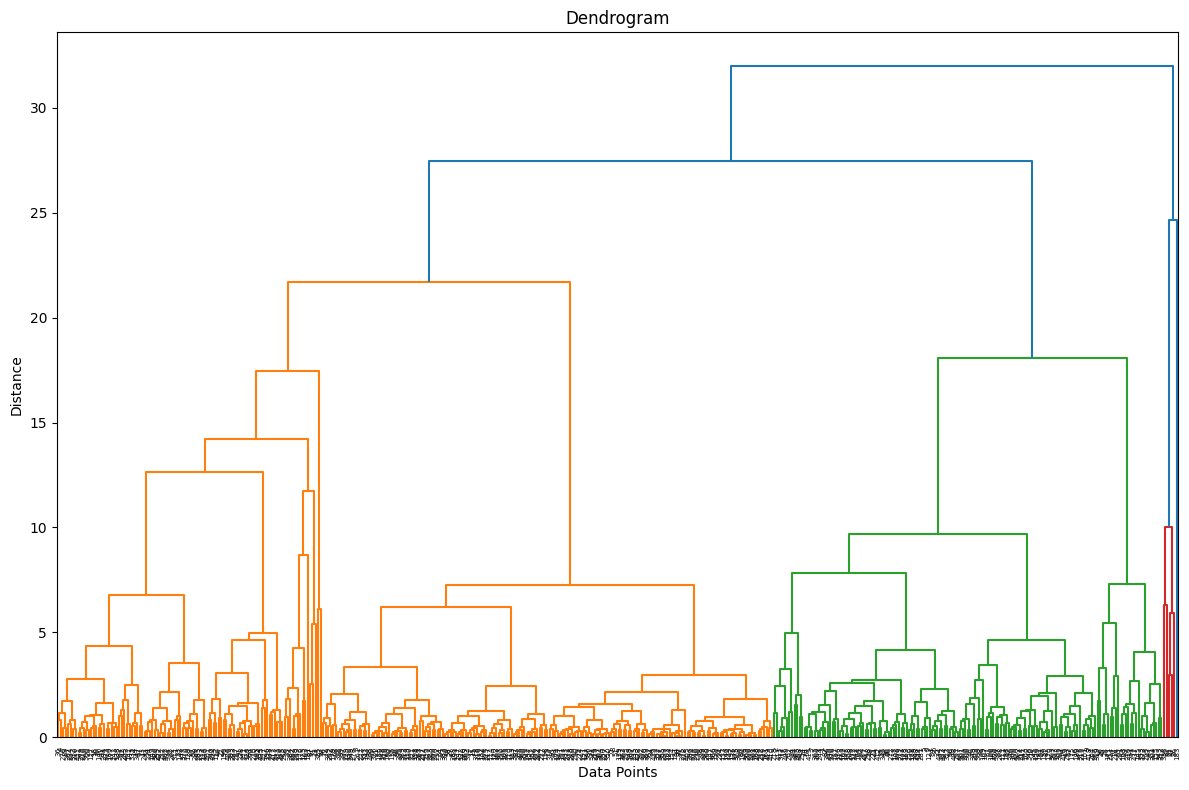

In [17]:
# Calculate the distance matrix using Euclidean distance
distance_matrix = linkage(data_standardized, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(distance_matrix, orientation='top', labels=data.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

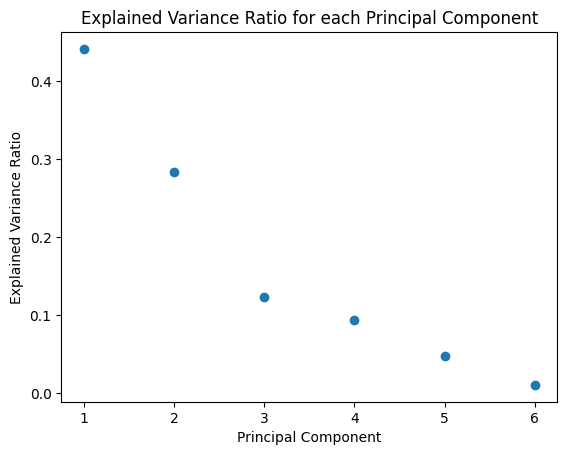

In [19]:
# Apply PCA
n_components = len(features)  # Number of components equals the number of features
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_standardized)

# Create a DataFrame with the PCA components
pca_components = ['PCA_Component_' + str(i + 1) for i in range(n_components)]
pca_df = pd.DataFrame(data_pca, columns=pca_components)

# Display the explained variance ratios
explained_variances = pca.explained_variance_ratio_
explained_variances_df = pd.DataFrame({'Explained_Variance_Ratio': explained_variances},
                                      index=pca_components)


In [20]:
explained_variances_df

,Explained_Variance_Ratio
PCA_Component_1,0.440829
PCA_Component_2,0.283764
PCA_Component_3,0.123344
PCA_Component_4,0.093955
PCA_Component_5,0.047613
PCA_Component_6,0.010495


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

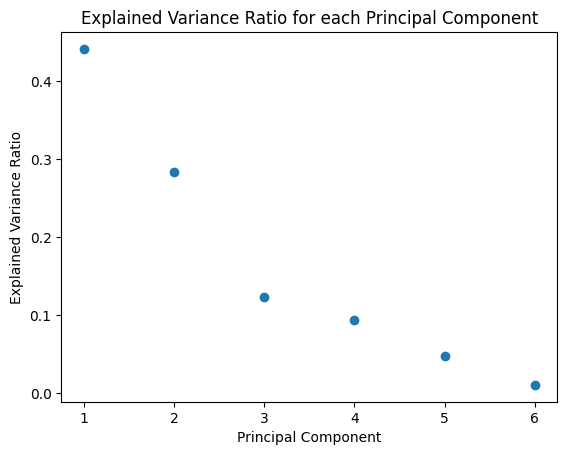

In [21]:
# Plot the explained variance ratio using scatter plot
plt.scatter(range(1, n_components + 1), explained_variances)
plt.xticks(range(1, n_components + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()

* the first six principal components capture approximately 90.57% of the total variance in the original data
* remaining components would capture the remaining variance but may have less significance compared to these six components 
* reducing the dimensionality to fewer components, we can represent most of the essential information while discarding less critical and redundant features